# Messenger Radio-Science collection

Select a subset from the MESSENGER Radio Science RSR Data Products Collection and gather the data in a single dataframe for easy analysis and visualization.  

In [1]:
import pds.peppi as peppi
import pandas as pd
import pdr
import os
from urllib.request import urlretrieve
from datetime import datetime

## Get the collection's product subset

From its identifier found on https://pds.nasa.gov/, see https://pds.nasa.gov/ds-view/pds/viewCollection.jsp?identifier=urn%3Anasa%3Apds%3Amess-rs-raw%3Adata-rsr&version=1.0

In [2]:
client = peppi.PDSRegistryClient()
start_date = datetime.fromisoformat("2012-03-02")
end_date = datetime.fromisoformat("2012-03-05")
products = peppi.Products(client).of_collection("urn:nasa:pds:mess-rs-raw:data-rsr::1.0") \
                                 .after(start_date).before(end_date)

## Iterate over the data products

Iterate over the products maching the the criteria above and aggregate the data content into a single dataframe, using [PDR](https://pdr.readthedocs.io/) .

In [3]:
df = None
for i, p in enumerate(products):

    # download label
    remote_label_path = p.properties['ops:Label_File_Info.ops:file_ref'][0]
    local_label_path = os.path.basename(remote_label_path)
    urlretrieve(remote_label_path, local_label_path)
 
    # download product
    remote_data_path = p.properties['ops:Data_File_Info.ops:file_ref'][0]
    local_data_path = os.path.basename(remote_data_path)
    urlretrieve(remote_data_path, local_data_path)
    
    # use Planetary Data Reader to read the data into a pandas DataFrame
    data = pdr.read(os.path.abspath(local_label_path))
    
    # append current data to a main dataframe
    df = pd.concat([df, data[ 'MESSENGER_Radio_Science_Receiver_(RSR)_raw_data' ]])
    
    # break because this is a lot of data
    if i>3:
        break

In [4]:
df

,SFDU Control Authority,SFDU Label Version ID,SFDU Class ID,SFDU Reserved,SFDU Data Description ID,SFDU RSR Length Pad,SFDU RSR Length,Header Aggregation CHDO Type,Header Aggregation CHDO Length,Primary Header CHDO Type,...,"I/Q Pair, I_3990","I/Q Pair, I_3991","I/Q Pair, I_3992","I/Q Pair, I_3993","I/Q Pair, I_3994","I/Q Pair, I_3995","I/Q Pair, I_3996","I/Q Pair, I_3997","I/Q Pair, I_3998","I/Q Pair, I_3999"
0,NJPL,2,I,12336,C997,0,16240,1,232,2,...,796.0,65450.0,60631.0,1443.0,7544.0,3094.0,64285.0,60389.0,3853.0,10843.0
1,NJPL,2,I,12336,C997,0,16240,1,232,2,...,60129.0,57308.0,61522.0,63473.0,58466.0,64058.0,2596.0,58943.0,60094.0,5559.0
2,NJPL,2,I,12336,C997,0,16240,1,232,2,...,64285.0,57983.0,54239.0,2332.0,59676.0,62370.0,3356.0,60638.0,61218.0,61666.0
3,NJPL,2,I,12336,C997,0,16240,1,232,2,...,8053.0,1458.0,15883.0,48.0,1924.0,5033.0,3614.0,60679.0,59099.0,65488.0
4,NJPL,2,I,12336,C997,0,16240,1,232,2,...,7044.0,61457.0,63778.0,12412.0,65533.0,4966.0,5867.0,56465.0,7863.0,2461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,NJPL,2,I,12336,C997,0,4240,1,232,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NJPL,2,I,12336,C997,0,4240,1,232,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NJPL,2,I,12336,C997,0,4240,1,232,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NJPL,2,I,12336,C997,0,4240,1,232,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['I/Q Pair, I_1']

0      61952
1      64668
2      57448
3      54839
4        724
       ...  
176     7446
177      577
178    10842
179    57357
180     2943
Name: I/Q Pair, I_1, Length: 905, dtype: uint16

## Plot one random field

/Users/loubrieu/PycharmProjects/search-api-notebook/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/loubrieu/PycharmProjects/search-api-notebook/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/loubrieu/PycharmProjects/search-api-notebook/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

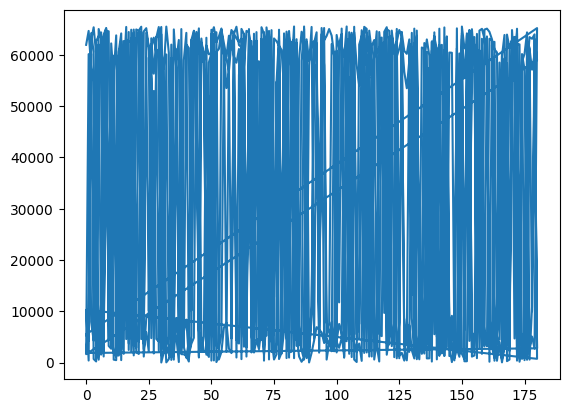

In [6]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(df["I/Q Pair, I_1"])
plt.show()

In [ ]:
plt.clf()